In [953]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

In [954]:
# load dataset
from google.colab import drive

# drive.mount('/drive')
data = pd.read_csv('/content/risk_of_brain_tumor.csv')
data.head()

,Unnamed: 0,Patient Id,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,...,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate,C-Risk Level
0,0,P1,33,1,3,4,2,2,2,2,...,3,4,4,2,3,3,2,2,4,0
1,1,P240,35,1,2,4,2,2,6,2,...,2,4,3,1,4,2,4,2,4,0
2,2,P239,42,1,4,3,2,1,3,2,...,1,2,2,3,1,1,1,1,2,0
3,3,P10,17,1,4,3,8,7,2,7,...,2,3,1,1,1,2,2,6,2,0
4,4,P238,22,0,3,4,3,1,5,1,...,4,2,2,2,3,6,5,1,1,0


In [955]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              363 non-null    int64 
 1   Patient Id              363 non-null    object
 2   Age                     363 non-null    int64 
 3   Gender                  363 non-null    int64 
 4   Genetic Risk            363 non-null    int64 
 5   Occupational Hazards    363 non-null    int64 
 6   Headache                363 non-null    int64 
 7   Seizure Rate            363 non-null    int64 
 8   Convulsion Rate         363 non-null    int64 
 9   Blurred Vision          363 non-null    int64 
 10  Double Vision           363 non-null    int64 
 11  Peripheral Vision Loss  363 non-null    int64 
 12  Loss of Smell           363 non-null    int64 
 13  Balance Disorder        363 non-null    int64 
 14  Nausea                  363 non-null    int64 
 15  Vomiti

In [956]:
null_perc=data.isnull().sum()/len(data)*100
null=data.isnull().sum()
overview=pd.concat((null,null_perc,data.nunique()),axis=1, keys=['Null counts','Null %','Cardinality'])
overview

,Null counts,Null %,Cardinality
Unnamed: 0,0,0.0,363
Patient Id,0,0.0,251
Age,0,0.0,36
Gender,0,0.0,2
Genetic Risk,0,0.0,7
Occupational Hazards,0,0.0,8
Headache,0,0.0,8
Seizure Rate,0,0.0,8
Convulsion Rate,0,0.0,7
Blurred Vision,0,0.0,7


In [957]:
# data['GENDER'].replace(['M', 'F'], [0, 1], inplace=True)
# data['LUNG_CANCER'].replace(['YES', 'NO'], [0, 1], inplace=True)
# data.drop_duplicates(inplace=True)
# data.head()

In [958]:
data.drop(["Patient Id", "Unnamed: 0"], axis=1, inplace = True)
data.drop_duplicates(inplace=True)

In [959]:
data

,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,Double Vision,Peripheral Vision Loss,...,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate,C-Risk Level
0,33,1,3,4,2,2,2,2,2,2,...,3,4,4,2,3,3,2,2,4,0
1,35,1,2,4,2,2,6,2,2,2,...,2,4,3,1,4,2,4,2,4,0
2,42,1,4,3,2,1,3,2,2,2,...,1,2,2,3,1,1,1,1,2,0
3,17,1,4,3,8,7,2,7,8,8,...,2,3,1,1,1,2,2,6,2,0
4,22,0,3,4,3,1,5,1,1,1,...,4,2,2,2,3,6,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,27,1,2,3,4,2,3,2,3,2,...,1,1,1,3,3,1,2,2,3,0
359,65,1,7,7,5,6,6,3,3,4,...,1,3,2,3,2,1,4,5,2,1
360,38,0,2,3,5,2,3,3,4,3,...,1,4,4,3,6,1,3,2,3,1
361,19,1,3,2,5,6,2,2,4,4,...,2,3,1,6,4,2,2,6,4,0


In [960]:
y = data['C-Risk Level']
X = data.drop('C-Risk Level',axis=1)


for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,Double Vision,Peripheral Vision Loss,Loss of Smell,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate
0,33,1,2,3,1,1,1,1,1,1,1,2,3,3,1,2,2,1,1,3
1,35,1,1,3,1,1,5,1,1,1,1,1,3,2,0,3,1,3,1,3
2,42,1,3,2,1,0,2,1,1,1,0,0,1,1,2,0,0,0,0,1
3,17,1,3,2,7,6,1,6,7,7,4,1,2,0,0,0,1,1,5,1
4,22,0,2,3,2,0,4,0,0,0,0,3,1,1,1,2,5,4,0,0


In [961]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [962]:
from imblearn.over_sampling import RandomOverSampler
X_train,y_train=RandomOverSampler().fit_resample(X_train,y_train)

In [963]:
X.shape

(249, 20)

In [964]:
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_val['Age'] = scaler.fit_transform(X_val[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

X_train

,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,Double Vision,Peripheral Vision Loss,Loss of Smell,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate
0,-1.186817,1,6,6,6,4,5,4,4,6,4,4,6,6,2,8,6,3,2,3
1,-0.850755,0,1,3,1,3,2,1,1,1,1,1,3,1,3,0,1,1,1,0
2,-0.010600,1,2,3,1,1,1,1,1,1,1,0,3,3,1,2,2,1,1,3
3,-0.514693,1,6,6,6,5,5,4,6,6,4,6,6,6,1,1,6,3,4,0
4,0.493493,1,4,5,3,1,3,1,1,2,1,4,5,3,6,4,5,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.157431,1,1,2,4,1,2,0,2,3,1,0,3,2,2,5,0,2,1,2
210,-1.270833,0,1,2,2,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0
211,-0.934771,1,2,3,2,0,4,0,2,1,0,3,1,1,1,2,5,3,0,0
212,-1.606895,1,4,5,0,1,4,0,0,0,1,3,4,3,1,4,4,2,1,5


In [965]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=9, activation='relu', input_shape=[20]))
model.add(tf.keras.layers.Dense(units=3, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [966]:
model.build()

In [967]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 9)                 189       
                                                                 
 dense_77 (Dense)            (None, 3)                 30        
                                                                 
 dense_78 (Dense)            (None, 1)                 4         
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [968]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                        epochs=150, batch_size=16,
                        validation_data=(X_val, y_val), 
                        shuffle=True)

Epoch 1/150
14/14 [==============================] - 2s 19ms/step - loss: 0.7519 - accuracy: 0.5841 - val_loss: 0.7981 - val_accuracy: 0.4800
Epoch 2/150
14/14 [==============================] - 0s 6ms/step - loss: 0.6775 - accuracy: 0.6215 - val_loss: 0.7411 - val_accuracy: 0.6000
Epoch 3/150
14/14 [==============================] - 0s 5ms/step - loss: 0.6480 - accuracy: 0.6776 - val_loss: 0.7162 - val_accuracy: 0.6400
Epoch 4/150
14/14 [==============================] - 0s 6ms/step - loss: 0.6342 - accuracy: 0.7103 - val_loss: 0.7058 - val_accuracy: 0.7000
Epoch 5/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6246 - accuracy: 0.7290 - val_loss: 0.6991 - val_accuracy: 0.7400
Epoch 6/150
14/14 [==============================] - 0s 5ms/step - loss: 0.6176 - accuracy: 0.7617 - val_loss: 0.6917 - val_accuracy: 0.7400
Epoch 7/150
14/14 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 0.7664 - val_loss: 0.6846 - val_accuracy: 0.8000
Epoch 8/150


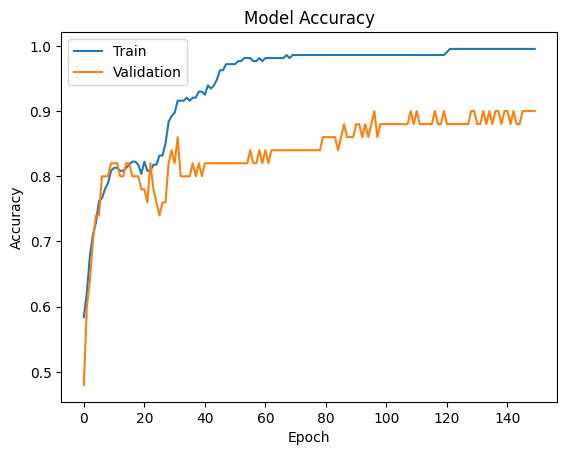

In [969]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

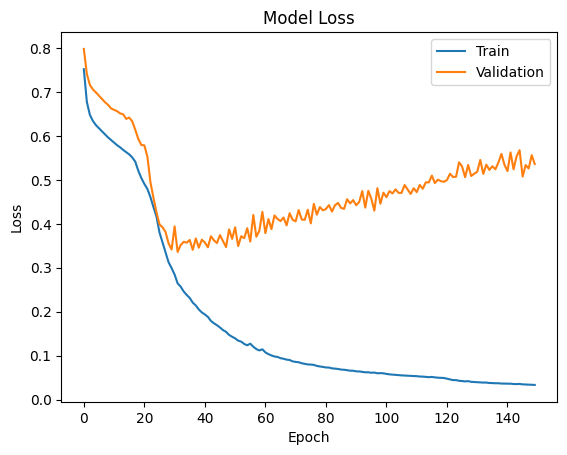

In [970]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [971]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 5ms/step - loss: 0.2124 - accuracy: 0.9600
Test loss: 0.21240581572055817
Test accuracy: 0.9599999785423279


2/2 [==============================] - 0s 3ms/step

Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

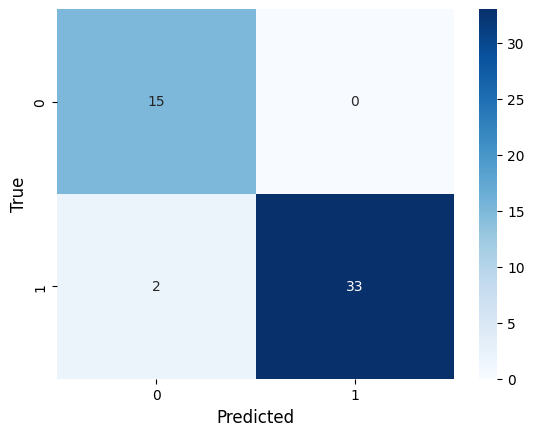

In [972]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test
y_pred = model.predict(X_test)

# Make the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true.round(), y_pred.round())
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [973]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.94      0.97        35

    accuracy                           0.96        50
   macro avg       0.94      0.97      0.95        50
weighted avg       0.96      0.96      0.96        50



In [974]:
print(model.trainable_variables) 

[<tf.Variable 'dense_76/kernel:0' shape=(20, 9) dtype=float32, numpy=
array([[-0.26598027, -0.8712656 , -0.01465955,  1.402813  ,  0.5987001 ,
         1.0461206 , -0.4322925 , -0.20078859, -1.0291992 ],
       [ 0.09422356,  0.50384766,  0.1827511 , -0.21409716, -0.48685402,
        -0.08333319,  0.09198093, -0.27445197,  0.15062805],
       [-0.32033917, -0.12204152,  0.21690656,  0.08770844,  0.2738454 ,
        -0.02472952,  0.1675972 ,  0.5505047 ,  0.24211697],
       [-0.01025478, -0.05930132, -0.24589074,  0.35964075,  0.53442794,
        -0.14675088,  0.11541118,  0.40707627, -0.02089146],
       [ 0.25938103,  0.21572743,  0.21390645,  0.10491254,  0.15549652,
         0.24117659,  0.29143527, -0.16643408,  0.08317532],
       [-0.13622496,  0.27249125, -0.12043729, -0.19880638, -0.10389796,
        -0.306257  , -0.33769834, -0.29480588, -0.00849539],
       [-0.15044966, -0.4840598 , -0.22738889,  0.2799354 ,  0.06879667,
        -0.3698282 ,  0.3211188 , -0.45259196,  0.254

In [981]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [982]:
model.save('my_model.h5')

In [983]:
from google.colab import files

files.download('saved_model/my_model/variables/variables.data-00000-of-00001')
files.download('saved_model/my_model/variables/variables.index')
files.download('saved_model/my_model/fingerprint.pb')
files.download('saved_model/my_model/keras_metadata.pb')
files.download('saved_model/my_model/saved_model.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [984]:
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [985]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [986]:
loss, acc = new_model.evaluate(X_test, y_test)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

2/2 [==============================] - 0s 9ms/step - loss: 0.2124 - accuracy: 0.9600
Restored model, accuracy: 96.00%
